# Acronyms and more exploration

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as sci_rnd
from scipy.stats import kurtosis
import pandas as pd

## RVS, PDF, PMF, CDF and other acronyms...

By now you will likely have noticed that in scipy.stats we called "distribution".rvs to get random varibles which were distributed as a particular distribution.

So what do the other functions mean within the class of a particular distribution?

### Exercise

Look up the definitions of:
1. RVS
2. PMF
3. PDF
4. CDF
5. PPF

Write them down below

In [ ]:
# Here
RVS - Random Variants is a particular outcome or realization of a random variable
PMF - Probability Mass Function is a function that gives the probability that a discrete random variable is exactly equal to some value
PDF - Probability Density Function defines the probability that some outcome will occur. The probability is the percentage of a dataset's distribution that falls between two criteria
CDF - Cumulative Distribution Function represents the probability that a random variable takes a value less than or equal to a certain value.
PPF - Percent Point Function is the inverse of a CDF. It is the value of a random variable such that its probability is less than or equal to an input probability value.

### Exercise

1. Use the scipy stats package and the above definitions to plot a curve (not a histogram!) of a Gaussian Distribution from x=0 to x=10 where the Gaussian distribution has a mean of 5 and a standard deviation of 2.

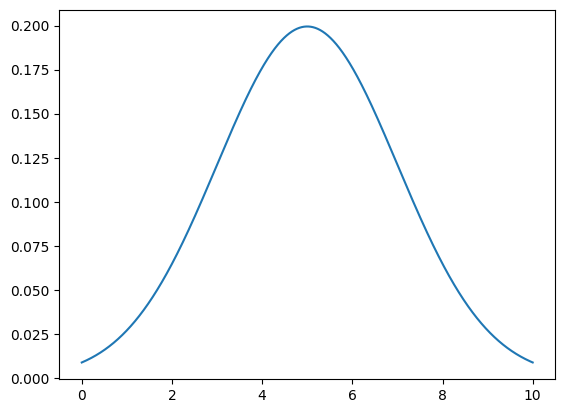

In [ ]:
# Answer here
x_axis = np.arange(0, 10, 0.001)
plt.plot(x_axis, sci_rnd.norm.pdf(x_axis,5,2))

## Large number limit

Let's see what happens when we have a high average rate of counts in a Poisson process.

In [ ]:
poisson1 = rnd.poisson(1., size=10000)
poisson10 = rnd.poisson(10., size=10000)
poisson10000 = rnd.poisson(10000., size=10000)

(array([3.641e-01, 3.685e-01, 1.858e-01, 6.140e-02, 1.610e-02, 3.300e-03,
        7.000e-04, 0.000e+00, 0.000e+00, 1.000e-04]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

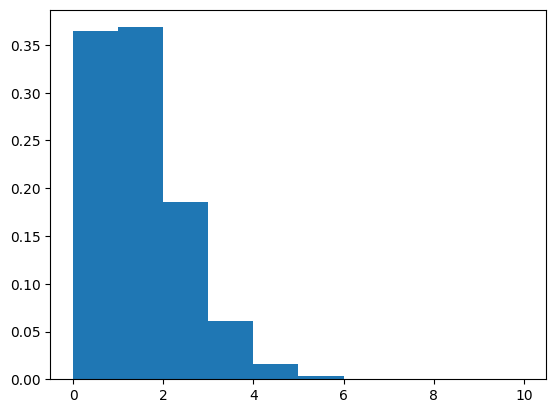

In [ ]:
plt.hist(poisson1, bins=np.arange(10+0.5), density=True)

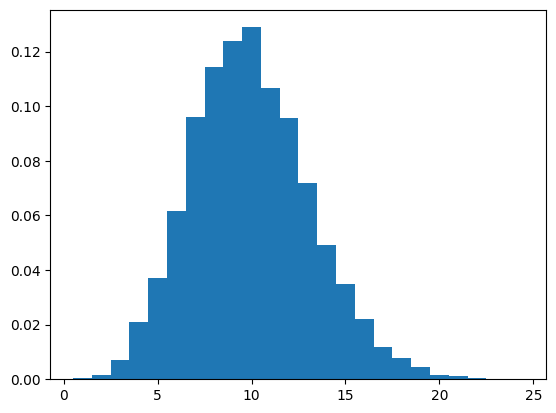

In [ ]:
plt.hist(poisson10, bins=(np.arange(25)+0.5), density=True);

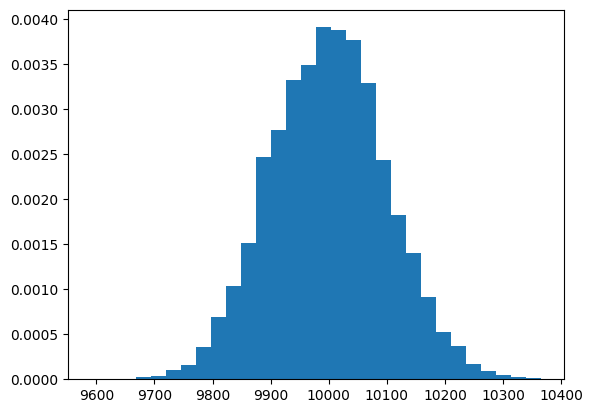

In [ ]:
plt.hist(poisson10000, bins=30, density=True);

### Exercise

What are the mean and variance of these three processes?

In [ ]:
# Answer here
print('The mean is %s and the std is %s for an average rate count of 1' % (poisson1.mean(), poisson1.std()))
print('The mean is %s and the std is %s for an average rate count of 10' % (poisson10.mean(), poisson10.std()))
print('The mean is %s and the std is %s for an average rate count of 10000' % (poisson10000.mean(), poisson10000.std()))

The mean is 1.0103 and the std is 1.008461159390881 for an average rate count of 1
The mean is 10.0125 and the std is 3.1646079931011992 for an average rate count of 10
The mean is 9999.4589 and the std is 99.89178900585372 for an average rate count of 10000


### Exercise

How do the mean and variance depend on the rate of the Poisson process? Can you make a plot? Do number of counts become more or less accurate as they get big?

Count becomes more accurate as it increases


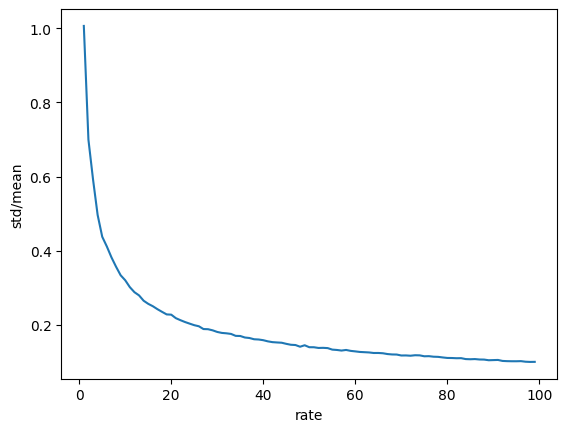

In [3]:
# Answer here
rates = np.arange(1,100)
means = np.array([np.mean(rnd.poisson(r, size=10000)) for r in rates])
stdevs = np.array([np.std(rnd.poisson(r, size=10000)) for r in rates])

plt.plot(rates, stdevs/means)
plt.xlabel('rate')
plt.ylabel('std/mean')

print('Count becomes more accurate as it increases')

### Exercise

1. Can you make a normal distribution that looks like poisson10 and another that matches poisson10000? Plot them and verify that they look alike.

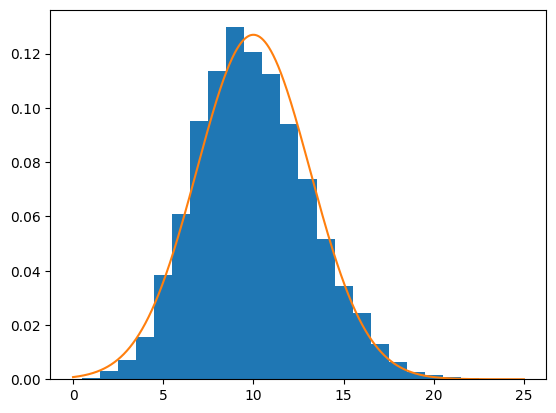

In [ ]:
# Answer here
# Poisson10 distribution
poisson10 = rnd.poisson(10., size=10000)
plt.hist(poisson10, bins=(np.arange(25)+0.5), density=True);

# Normal distribution using scipy stat package with same std and mean as Poisson10
x_axis = np.arange(0, 25, 0.0001)
plt.plot(x_axis, sci_rnd.norm.pdf(x_axis,poisson10.mean(),poisson10.std()))

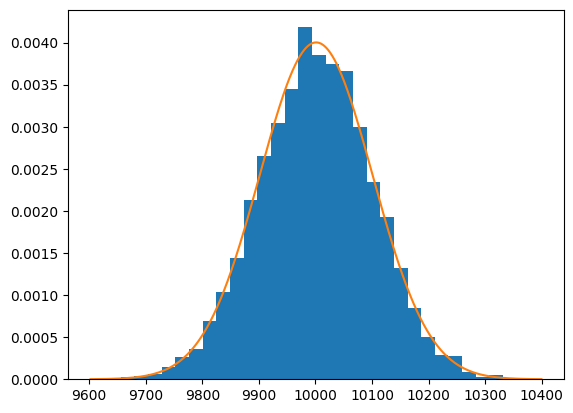

In [ ]:
# Poisson10000 distribution
poisson10000 = rnd.poisson(10000., size=10000)
plt.hist(poisson10000, bins=30, density=True);

# Normal distribution using scipy stat package with same std and mean as Poisson10000
x_axis = np.arange(poisson10000.mean() - 4*poisson10000.std(), poisson10000.mean() + 4*poisson10000.std(), 1)
plt.plot(x_axis, sci_rnd.norm.pdf(x_axis,poisson10000.mean(),poisson10000.std()))

## Higher Moments

There are more statistics that can be calculated beyond mean and standard deviation. The next two are called skewness and kurtosis.

If two distributions have the same mean and standard deviation, kurtosis can help tell them apart. Positive kurtosis means that there are many values very far from the center; negative that they are concentrated at the middle. The normal distribution is defined to have zero kurtosis.

### Exercise

1. Recall how to make a normal distribution with the same mean and standard deviation as a given Poisson distribution. We've imported a `kurtosis` function (see above). Try using the kurtosis to prove that poisson and normal distibutions are actually different.  Redo this for Poisson10000 - what do you notice?

Kurtosis for Poisson distribution with rate of 10 is 0.18104635597428143
Kurtosis for Norm distribution with same std and mean as Poisson distribution is 0.01704343950842402
Kurtosis for Poisson distribution with rate of 10000 is 0.011276969745697585
As the rate of a Poisson distribution increases, the kurtosis tends to 0, indicating approaching a normal distribution


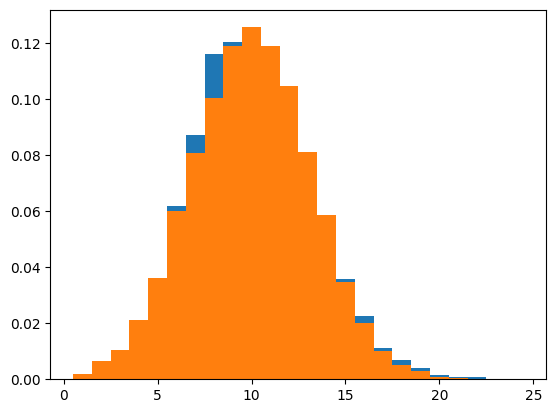

In [ ]:
# Answer here
# Same Poisson distribution with rate of 10 as above cell
poisson_dist = rnd.poisson(10., size=10000)
plt.hist(poisson_dist, bins=(np.arange(25)+0.5), density=True);
kurt_poisson = kurtosis(poisson_dist)
print('Kurtosis for Poisson distribution with rate of 10 is %s' % (kurt_poisson))

# Normal distribution with same mean and std as above Poisson distribution
norm_dist = sci_rnd.norm.rvs(poisson10.mean(), poisson10.std(), size=10000);
plt.hist(norm_dist, bins=(np.arange(25)+0.5), density=True)
kurt_norm = kurtosis(norm_dist)
print('Kurtosis for Norm distribution with same std and mean as Poisson distribution is %s' % (kurt_norm))

# COpied from cell above - Poisson10000 distribution
poisson10000 = rnd.poisson(10000., size=10000)
kurt_poisson10000 = kurtosis(poisson10000)
print('Kurtosis for Poisson distribution with rate of 10000 is %s' % (kurt_poisson10000))
print('As the rate of a Poisson distribution increases, the kurtosis tends to 0, indicating approaching a normal distribution')

### Exercise
1. Find a function to import for skewness and test this for your two distributions.

In [ ]:
from scipy.stats import skew

print('Skewness for a Poisson distribution with rate of 10 is %s' % (skew(poisson_dist)))
print('Skewness for a Normal distribution with the same mean and std as Poisson distribution is %s' % (skew(norm_dist)))

Skewness for a Poisson distribution with rate of 10 is 0.2990787027174164
Skewness for a Normal distribution with the same mean and std as Poisson distribution is -0.00888708674441223
